# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#remove limit for number of displayed columns
pd.set_option('display.max_columns', None)
#set the limit fo teh number of displated rows
pd.set_option('display.max_rows', 250)
#set precision of floating numbers to 5 decimal places
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# to scale data using z-score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

#algorithms to import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn import tree

#model evaluation metrics
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    recall_score,
    f1_score,
    accuracy_score,
    precision_score,
    roc_auc_score,
    roc_curve,
    make_scorer
    )

#model tuning
from sklearn.model_selection import GridSearchCV

#ingore warnings
import warnings
warnings.filterwarnings('ignore')

In [79]:
#loading the dataset
data = pd.read_csv('/content/drive/MyDrive/DSML/Week 8/Project 2/ExtraaLearn.csv')

In [80]:
#copying dataframe to avoid changes to original dataset
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [81]:
# checking dataset columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [82]:
# double checking for missing values
df.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [83]:
#inspecting the frist 5 rows
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [84]:
# inspecting the last 5 rows
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [85]:
# checking shape of dataset
df.shape

(4612, 15)

In [86]:
# checking for duplicate entries
df.duplicated().sum()

0

Observations

The dataset contains 4612 entries with 15 parameters, with no missing values. All categorical variables are of the expected datatype and there are no duplicate entries.

In [87]:
# checking for unique values in each column
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

####Observations:

*   ID is a unique identifier for each customer. Given there are 4612 unique values (the same as number of entries) we can conclude that each row is a single unique customer and no customer has multiple rows. This will not be useful for our model so we can drop this column.
*  The columns: print_media_type1, print_media_type2, digital_media, educational_channels, referral and status all have two unique values - per the data description and inspecting the rows, these can be replaced with binary values values 0 and 1.



In [88]:
#dropping ID column from DF
df = df.drop(['ID'], axis=1)

In [89]:
#verifying dropped column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

In [90]:
#define list for numerical variables
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

#define list for categorical variables
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity',
            'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels',
            'referral','status']

In [91]:
# converting data type of categorical variables to 'category'
for column in cat_cols:
  df[column]=df[column].astype('category')

In [92]:
#inspecting df columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    4612 non-null   int64   
 1   current_occupation     4612 non-null   category
 2   first_interaction      4612 non-null   category
 3   profile_completed      4612 non-null   category
 4   website_visits         4612 non-null   int64   
 5   time_spent_on_website  4612 non-null   int64   
 6   page_views_per_visit   4612 non-null   float64 
 7   last_activity          4612 non-null   category
 8   print_media_type1      4612 non-null   category
 9   print_media_type2      4612 non-null   category
 10  digital_media          4612 non-null   category
 11  educational_channels   4612 non-null   category
 12  referral               4612 non-null   category
 13  status                 4612 non-null   category
dtypes: category(10), float64(1), int64(3)
me

In [93]:
# Printing number of count of each unique value in each column
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------------------------------------
No     4085
Yes     527
Name: digital_media, dtype: int64
--------------------------------------------------
No     3907
Yes     705
Name: educational_channels, dtype: int64
--------------------------

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### Numerical Univariate Analysis

In [94]:
#statistical summary of numerical variables
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400


Observations of Numerical Variables

*   Average age is about 46 years old, with a large range from 18 to 63 years old. This mid to high average age indicates the majority of customers may be established career professionals looking to further their education, or potentially make a career switch.
*   The average number fo wbsite visits is only about 3.5 with a pretty tight distribution. This indicates most customers only visit the website a handfull of times. Additionally it appears at least one customer has never visited the site.
*   Similarly for time spent on websute, the average person spends about 12 minutes, ranging up to 22 minutes for the 75th percentile.
*   Finally, the average customer makes a similarly distributed number of page views per visit - this makes sense when viewed side by side with website visits.

In [95]:
#create function for combined histogram boxplot
def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins = None):
  figure, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=figsize)

  #creating the boxplot
  sns.boxplot(data = data, x = feature, ax = ax_box, showmeans = True, color = 'violet')

  #create histogram based on provided bins parameter
  if bins==None:
    sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist)
  else:
    sns.histplot(data = data, x = feature, kde=kde, ax = ax_hist, bins = bins)

  #add mean and median line to histogram
  ax_hist.axvline(data[feature].mean(), color = 'green', linestyle='--')
  ax_hist.axvline(data[feature].median(), color='black', linestyle='-')

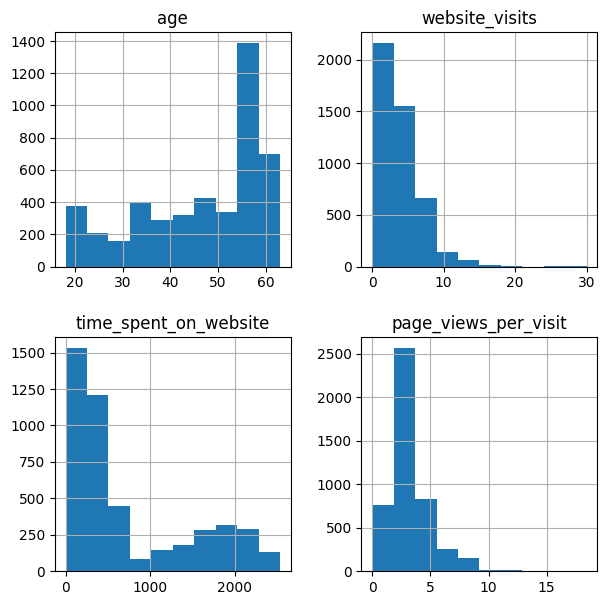

In [96]:
df[num_cols].hist(figsize=(7,7))
plt.show()

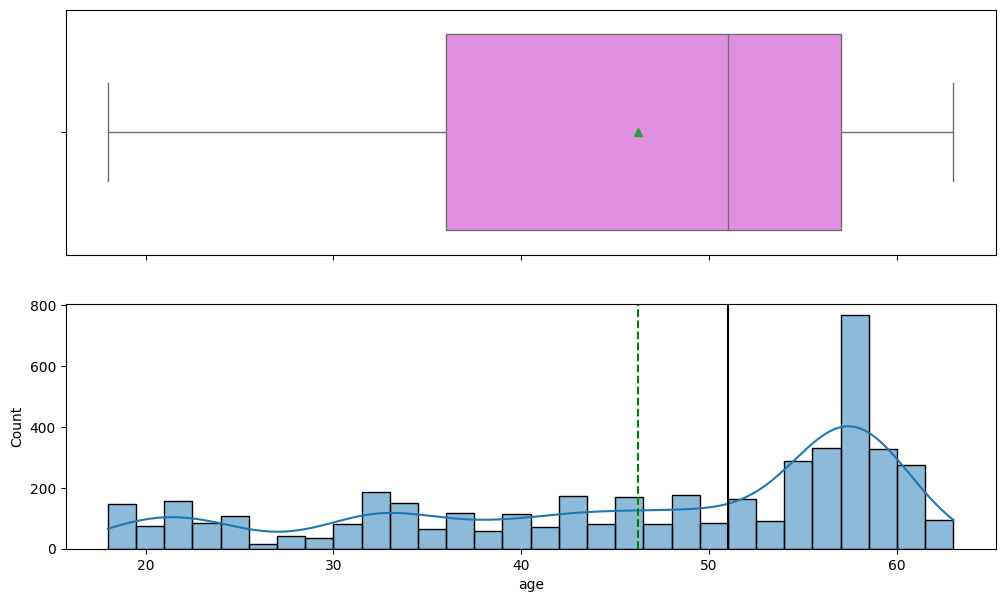

In [97]:
histogram_boxplot(df, 'age', bins=30)

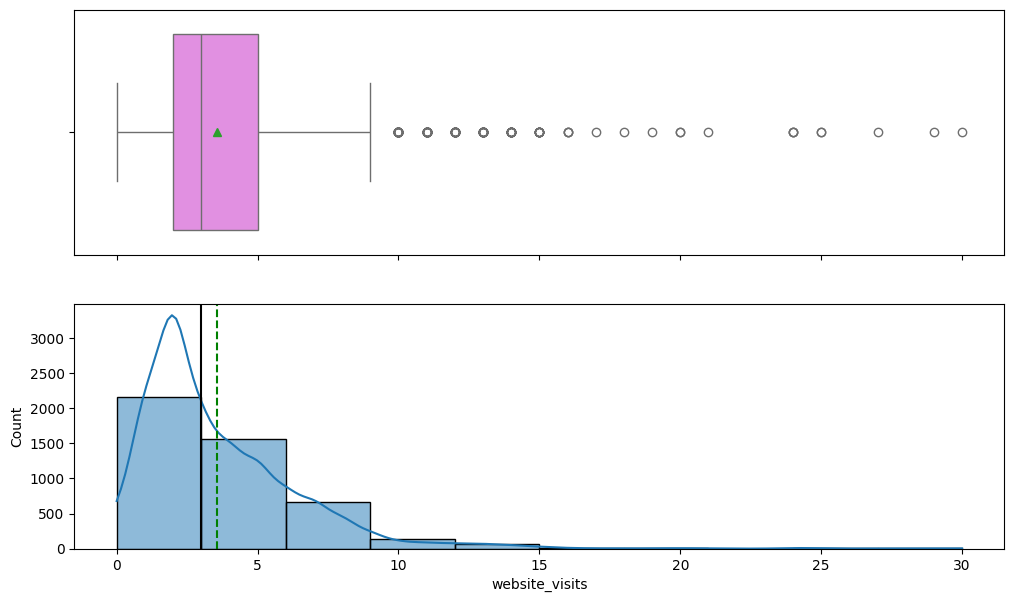

In [98]:
histogram_boxplot(df, 'website_visits', bins=10)

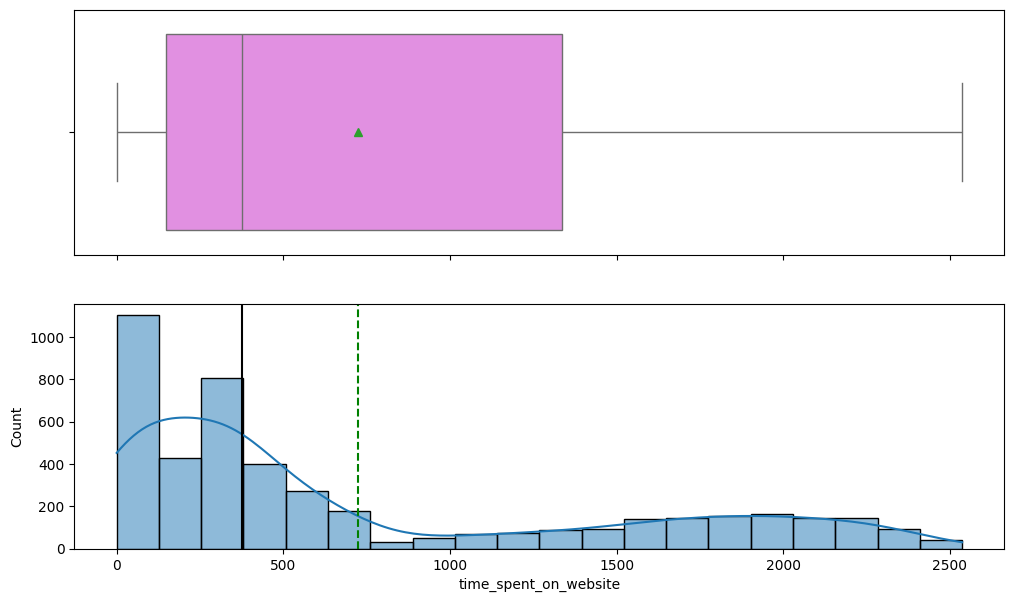

In [99]:
histogram_boxplot(df, 'time_spent_on_website', bins=20)

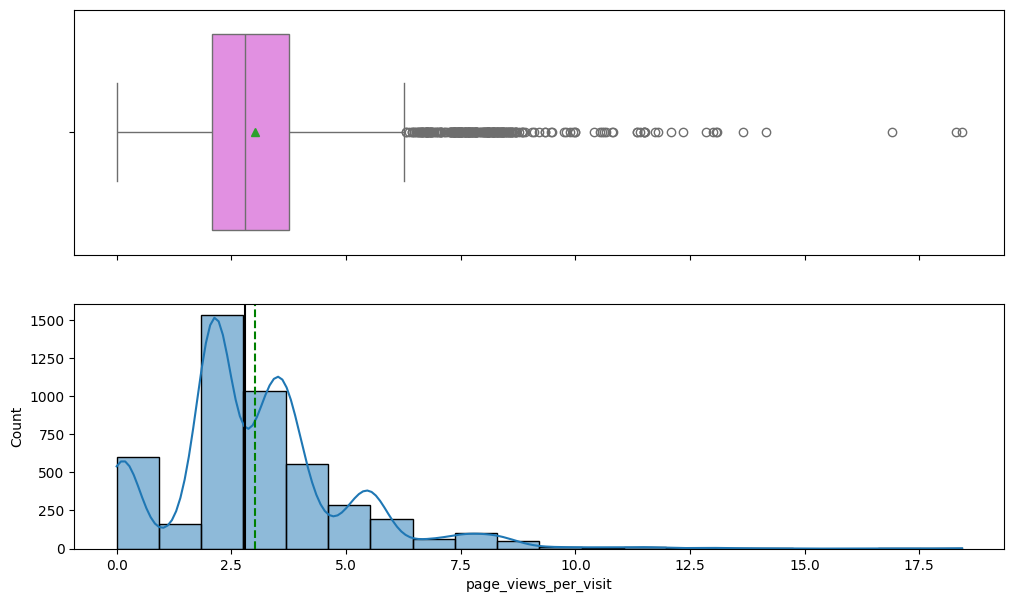

In [100]:
histogram_boxplot(df, 'page_views_per_visit', bins=20)

Observations:

*   The age of customers is heavily left-skewed. There is a high concentration of patroms around age 57, and a relatively high mean age.
*   For the website metrics (number of visits, time and page views), the data skews to the right. Most customers spend relatively little amount of time on the website, however there are a number of outliers that spend significantly more time/visit the website more often.

###Categorical Univariate Analysis

In [101]:
# Printing categorical variables by percentage
for i in cat_cols:
  print(df[i].value_counts(normalize=True))
  print('-'*50)

Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: current_occupation, dtype: float64
--------------------------------------------------
Website      0.55117
Mobile App   0.44883
Name: first_interaction, dtype: float64
--------------------------------------------------
High     0.49089
Medium   0.48591
Low      0.02320
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: last_activity, dtype: float64
--------------------------------------------------
No    0.89224
Yes   0.10776
Name: print_media_type1, dtype: float64
--------------------------------------------------
No    0.94948
Yes   0.05052
Name: print_media_type2, dtype: float64
--------------------------------------------------
No    0.88573
Yes   0.11427
Name: digital_media, dtype: float64
--------------------------------------------------
No    0.84714
Yes   0.15286
Name: education

Observations:

*  The majority of leads are made up of professional's, and about 1/3 are unemployed. The small percentage of leads that are students makes sense, as students most likely are already occupied with full time studies.
*  First impressions are almost evely split between web and mobile app.
*  The vast majority of profiles are medium to highly complete, which may perhaps be surprising.
*  Email seems to be the most popular method of communication from leads.
*  A very small percentage of leads are exposed to print advertising and digital media is only 11%. Overall print, digital, educational channels and referrals only add up to about 50%, so further data collection may be required to fully understand where leads are coming from (perhaps from google searches, etc...).
*   About 30% of leads convert to paid customers, which may be relatively low compared to business objectives. More needs to be understood about why leads aren't necessarily converting.


### Bivariate and Multivariate Analysis

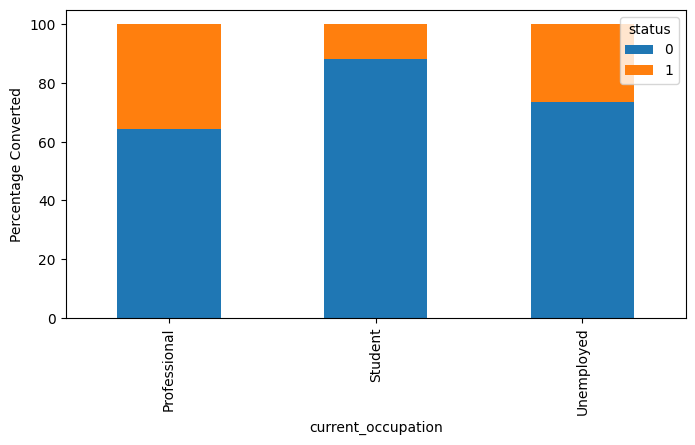

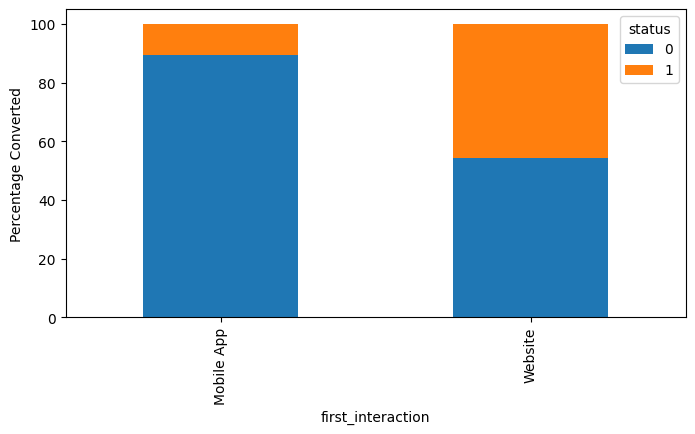

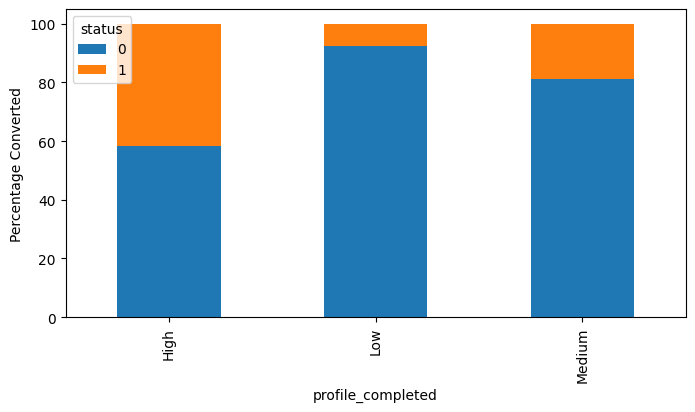

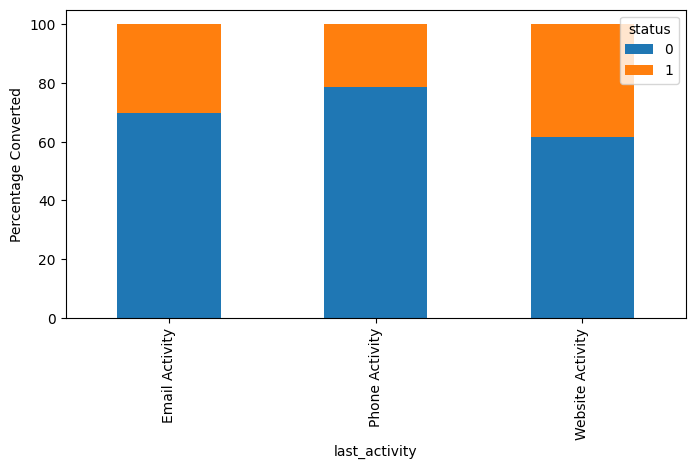

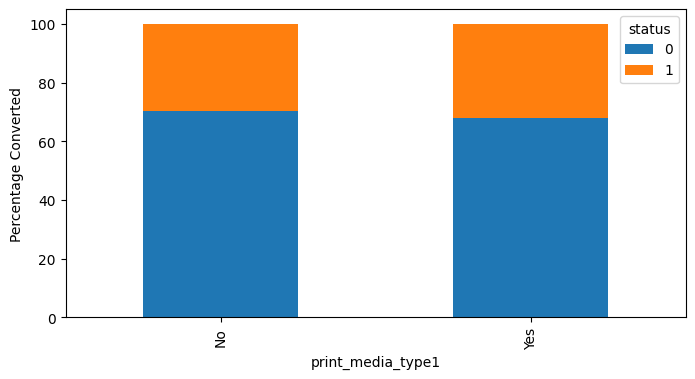

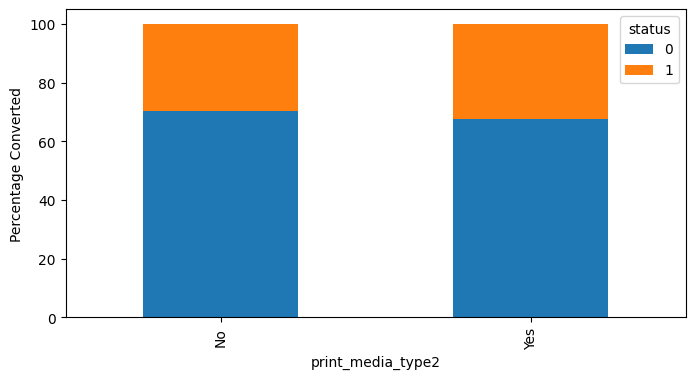

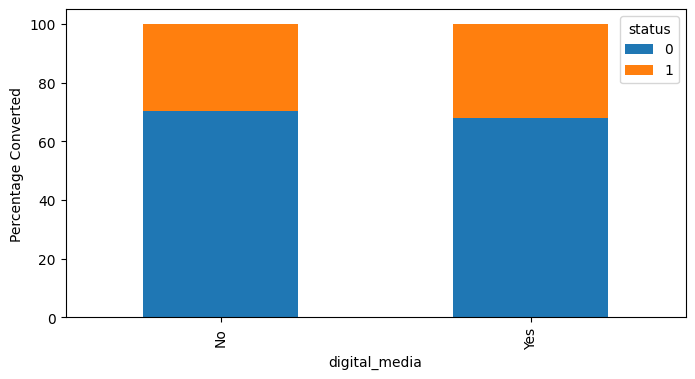

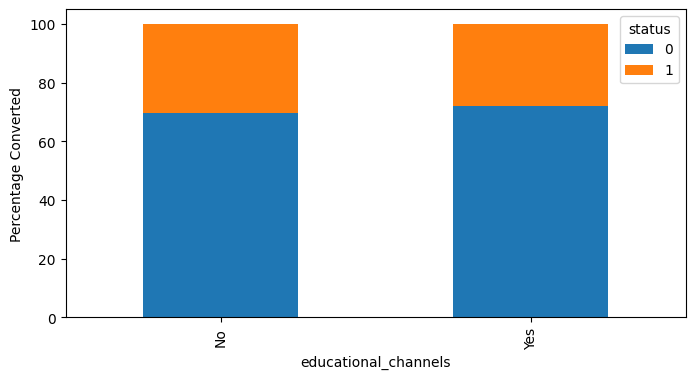

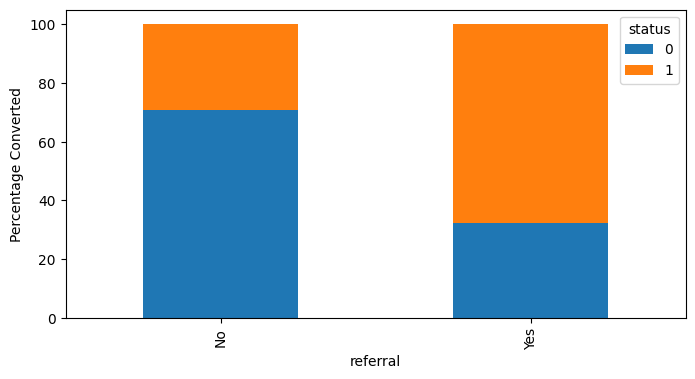

In [102]:
# creating cross tab of categorical variables and status
for i in cat_cols:
  if i!='status':
    (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
    plt.ylabel('Percentage Converted')

**Observations**

*  Unsurprisingly, professionals have the highest rate of conversion. This makes sense as they likely have disposable income or employer education incentives. Unemployed followed closely, also making sense as they may have strong incentive to sharpen their job skills.
*  First interactions made on the website have a much higher conversion rate. This may suggest that investment in the mobile app could help with greater conversions.
*  Unsurprisingly, more complete profiles have higher conversion, suggesting that the more invested a lead is the more likely they are to convert. It may also help to target more complete profiles.
*  Website activity has the highest conversion rate, which is interesting given email had the greatest number of communications. This may suggest that the immediate interaction provided from online chat is more effective at helping leads. The business may want to think of ways to funnel customers from email to chat communications to increase responsiveness and conversions.
*  Print media, digital media, and educational channels don't see any significant difference in conversion.
*  Those that are referred have sigificantly higher conversion. This may be a great area of opportunity given the small number of referrals. Perhaps a referral incentive could help.

In [103]:
# mean of numerical variables grouped by status
df.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.15301,3.57898,577.42071,3.02573
1,48.66376,3.53813,1068.39797,3.02705


**Observations**

*  In regards to age, those who converted were slightly older.
*  The only other variable with any significant difference in conversion is the time spent on the website. Those who converted spent much more time looking at the website.

<Axes: >

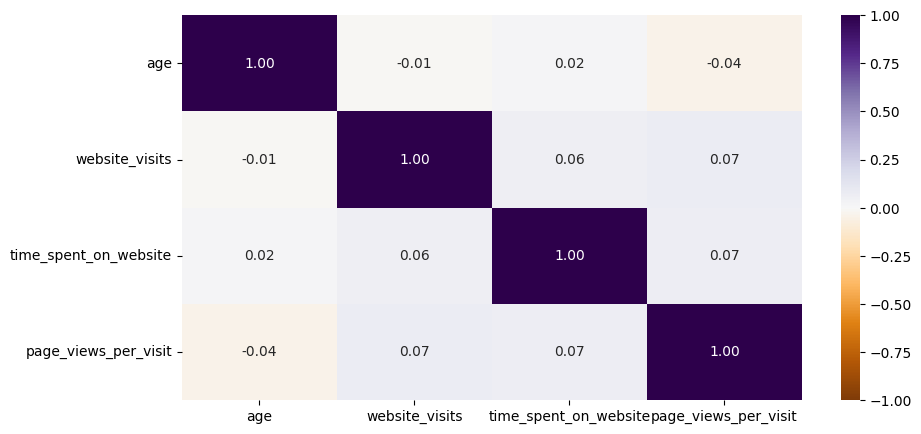

In [104]:
# plotting correlation matrix between numerical variables as a heatmat
plt.figure(figsize=(10,5))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='PuOr', vmin=-1, vmax=1)

**Observations**

*  There is not any significant correlation between any of the numerical variables.

## Data Preprocessing

- Missing value treatment (not needed)
- Feature engineering (not needed)
- Outlier detection and treatment (not needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [105]:
# creating a list of categorical variables that need dummy columns
to_get_dummies_for = ['current_occupation','first_interaction','profile_completed','last_activity']

# creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for)

# mapping binary yes/no variables
dict_yes_no = {'Yes': 1, 'No':0}

df['print_media_type1'] = df.print_media_type1.map(dict_yes_no)
df['print_media_type2'] = df.print_media_type2.map(dict_yes_no)
df['digital_media'] = df.digital_media.map(dict_yes_no)
df['educational_channels'] = df.educational_channels.map(dict_yes_no)
df['referral'] = df.referral.map(dict_yes_no)


In [106]:
# inspecting first 5 rows after dummy replacement
df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,profile_completed_High,profile_completed_Low,profile_completed_Medium,last_activity_Email Activity,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.86100,1,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1
1,56,2,83,0.32000,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
2,52,3,330,0.07400,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
3,53,4,464,2.05700,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1
4,23,4,600,16.91400,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0


In [107]:
# separating the independent variables from depentent variable

Y = df.status
X = df.drop(columns=['status'])

In [108]:
# splitting data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state=1, stratify = Y)

In [109]:
# scaling the data, incase of logistic regression
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# transform on test data
X_test_scaled=sc.fit_transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [110]:
# checking scaled data info
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              3228 non-null   float64
 1   website_visits                   3228 non-null   float64
 2   time_spent_on_website            3228 non-null   float64
 3   page_views_per_visit             3228 non-null   float64
 4   print_media_type1                3228 non-null   float64
 5   print_media_type2                3228 non-null   float64
 6   digital_media                    3228 non-null   float64
 7   educational_channels             3228 non-null   float64
 8   referral                         3228 non-null   float64
 9   current_occupation_Professional  3228 non-null   float64
 10  current_occupation_Student       3228 non-null   float64
 11  current_occupation_Unemployed    3228 non-null   float64
 12  first_interaction_Mo

In [111]:
# checkign scaled data stats
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3228.00000,-0.00000,1.00015,-2.14163,-0.77246,0.36852,0.82491,1.28130
website_visits,3228.00000,0.00000,1.00015,-1.26931,-0.57243,-0.22398,0.47290,8.83551
time_spent_on_website,3228.00000,0.00000,1.00015,-0.97405,-0.78163,-0.47007,0.85143,2.42192
page_views_per_visit,3228.00000,-0.00000,1.00015,-1.55816,-0.50003,-0.11026,0.35115,7.75796
print_media_type1,3228.00000,-0.00000,1.00015,-0.35152,-0.35152,-0.35152,-0.35152,2.84481
print_media_type2,3228.00000,0.00000,1.00015,-0.23651,-0.23651,-0.23651,-0.23651,4.22814
digital_media,3228.00000,0.00000,1.00015,-0.35374,-0.35374,-0.35374,-0.35374,2.82695
educational_channels,3228.00000,0.00000,1.00015,-0.43115,-0.43115,-0.43115,-0.43115,2.31936
referral,3228.00000,0.00000,1.00015,-0.13878,-0.13878,-0.13878,-0.13878,7.20542
current_occupation_Professional,3228.00000,-0.00000,1.00015,-1.15428,-1.15428,0.86634,0.86634,0.86634


# Model Evaluation Criterion

####Wrong Predictions:
1.  Predicting a lead will convert to paid customer and customer does not.
2.  Predicting a lead will not convert to paid customer when actually would convert.

####Which case is most important?
*   Predicting that a lead will convert to a paid customer that actually will not (False Negative) is worse for the company. This would equate to a waste of resources, as they would be targeting leads that will not convert.

####How to reduce this loss ie. reduce False Negatives?
*   The company wants Recall to be maximized, the greater the recall the lesser the chances of false negatives.


In [112]:
# creating a metrics function
def metrics_score(actual,predicted):
  print(classification_report(actual,predicted))

  cm = confusion_matrix(actual, predicted)
  plt.figure(figsize=(8,5))

  sns.heatmap(cm, annot=True, fmt='.2f')
  plt.ylabel('Actual')
  plt.xlabel('Predicted');

## Building a Decision Tree model

In [113]:
#creating decision tree model with Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=1, class_weight = {0: 0.30, 1: 0.70})
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



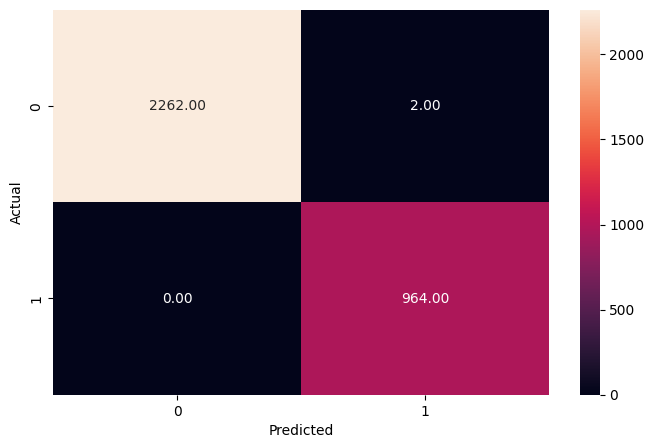

In [114]:
# checking perofmrance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(Y_train, pred_train_dt)

**Observations**
*  The model has correctly classified every single data point, showing no false positives and no false negatives.
*  This model is almost certainly overfitting, as there are no restrictions in place.
*  We can verify by checking performance on teh test set.

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       971
           1       0.67      0.63      0.65       413

    accuracy                           0.80      1384
   macro avg       0.76      0.75      0.75      1384
weighted avg       0.80      0.80      0.80      1384



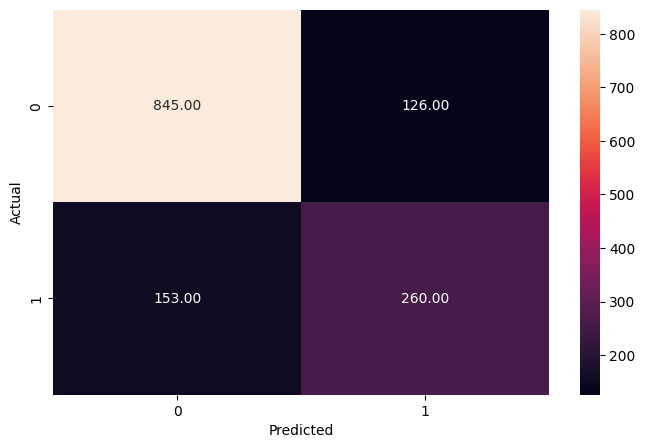

In [115]:
# checking model performance on the test set
pred_test_dt = model_dt.predict(X_test)
metrics_score(Y_test, pred_test_dt)

**Observations**
*  This has verified what we suspected, that the model is currently overfitting. The metrics of the test data suggest that there is a 35% chance that the model will predict a lead is likely to convert even though they would not. This would equate to lost time and resources for the company.
*  Overall, the recall for our positive outcome is 63%, which indicates a very weak model.

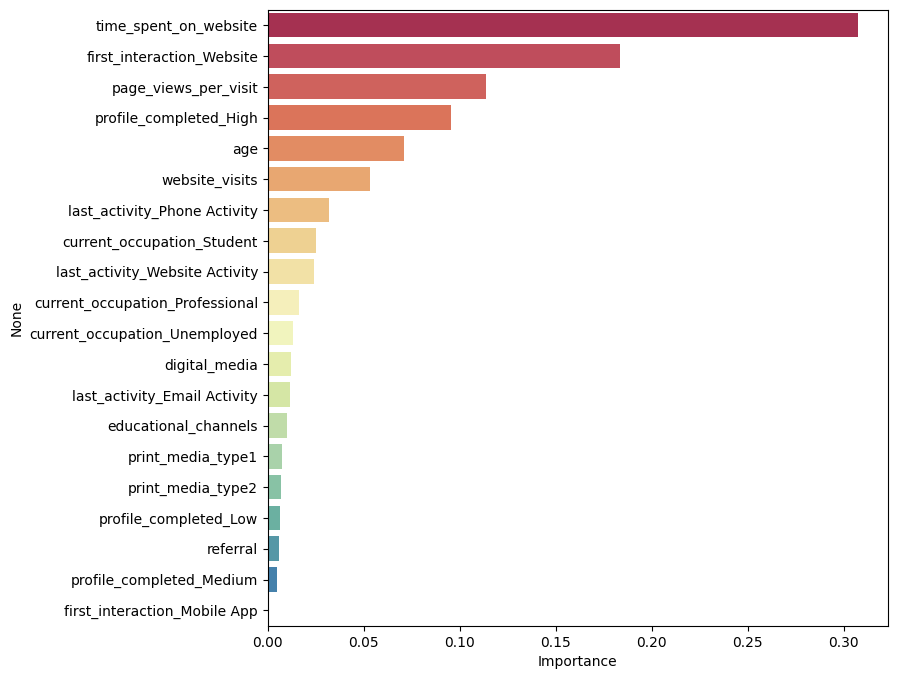

In [116]:
# checking feature importances

importances = model_dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index, palette='Spectral');

Observations:
*  According to this first tree, Time Spent on Website is the most important factor in lead conversion, followed by page views per visit, age, being a working professional and having a highly complete profile.
*  This seems to signify that the leads with best chances of conversion spend the most time on the website, who are older working professionals.
*  This model would benefit from additional tuning so we can reduce overfitting and better classify leads for targeting.

## Do we need to prune the tree?

*  Yes, this model would benefit from further tuning to increase performance and reduce overfitting.

In [117]:
#creating decision tree model with Decision Tree Classifier
dt_estimator = DecisionTreeClassifier(random_state=1, class_weight = {0: 0.30, 1: 0.70})

#grid of parameters
parameters = {
    'max_depth': np.arange(2,30),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [5, 10, 20, 30],
}
#run the grid search
grid_obj = GridSearchCV(dt_estimator, parameters, cv=5, scoring='recall', n_jobs=-1)
grid_obj = grid_obj.fit(X_train, Y_train)

#set the classifier to the best combination of parameters
dt_estimator = grid_obj.best_estimator_

#fit the best algorithm to the test data
dt_estimator.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_split=5, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



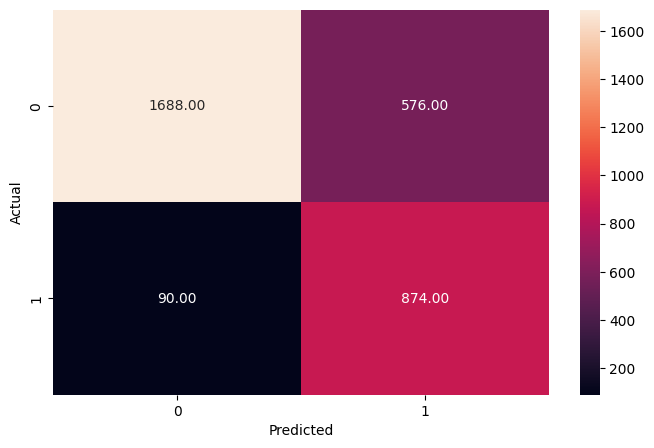

In [118]:
#checking the performance on the training set
dt_tuned = dt_estimator.predict(X_train)
metrics_score(Y_train, dt_tuned)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



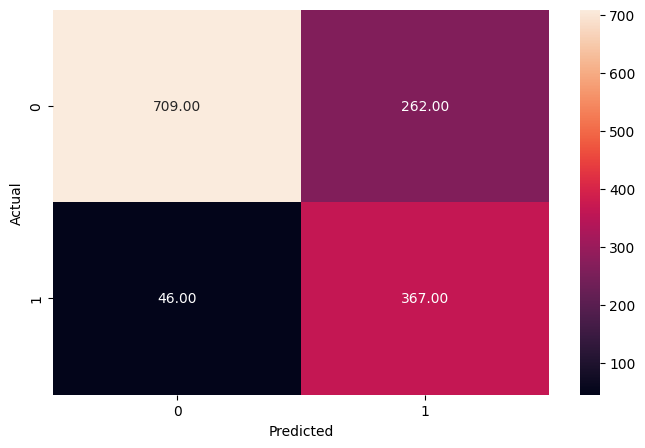

In [119]:
#checking the performance on the test set
dt_tuned = dt_estimator.predict(X_test)
metrics_score(Y_test, dt_tuned)

Observations:
*  The tuned model is providing a more generalized performance, with more balance.
*  Through tuning, overfitting of the test data has been greatly reduced, and the model's recall has increased to 89%. This means we can reduce waste of resources by not targeting leads that ultimately will not convert.
*  It is important to note that this model's precision is now very low - if the company wants to focus on casting a wider net in hopes of targeting more possible conversions, regardless of false negatives, we would need to focus on tuning a model with greater precision.

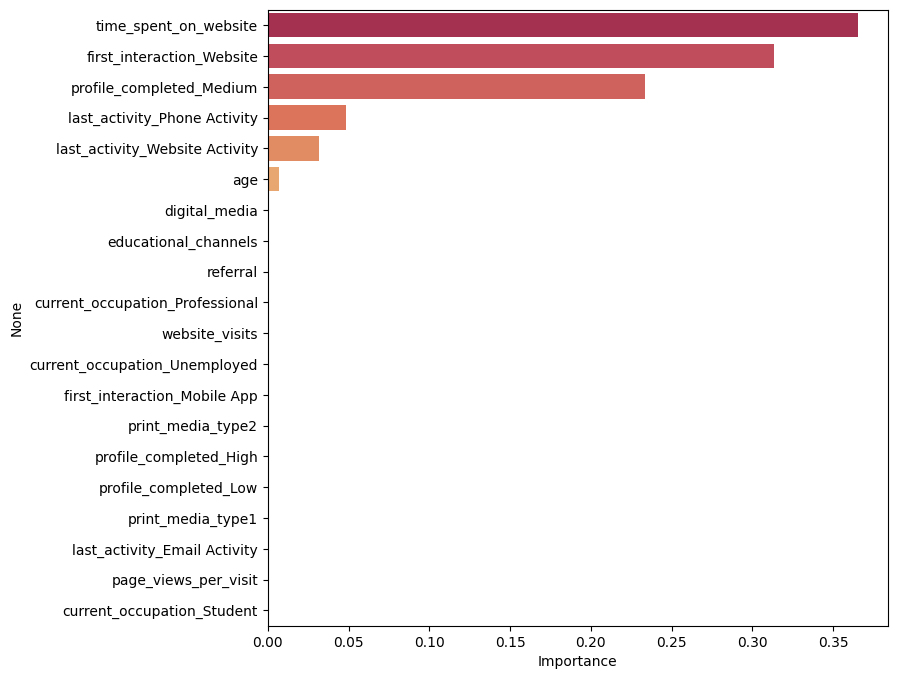

In [120]:
# checking feature importances after tuning

importances = dt_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index, palette='Spectral');

###Visualizing the Decision Tree

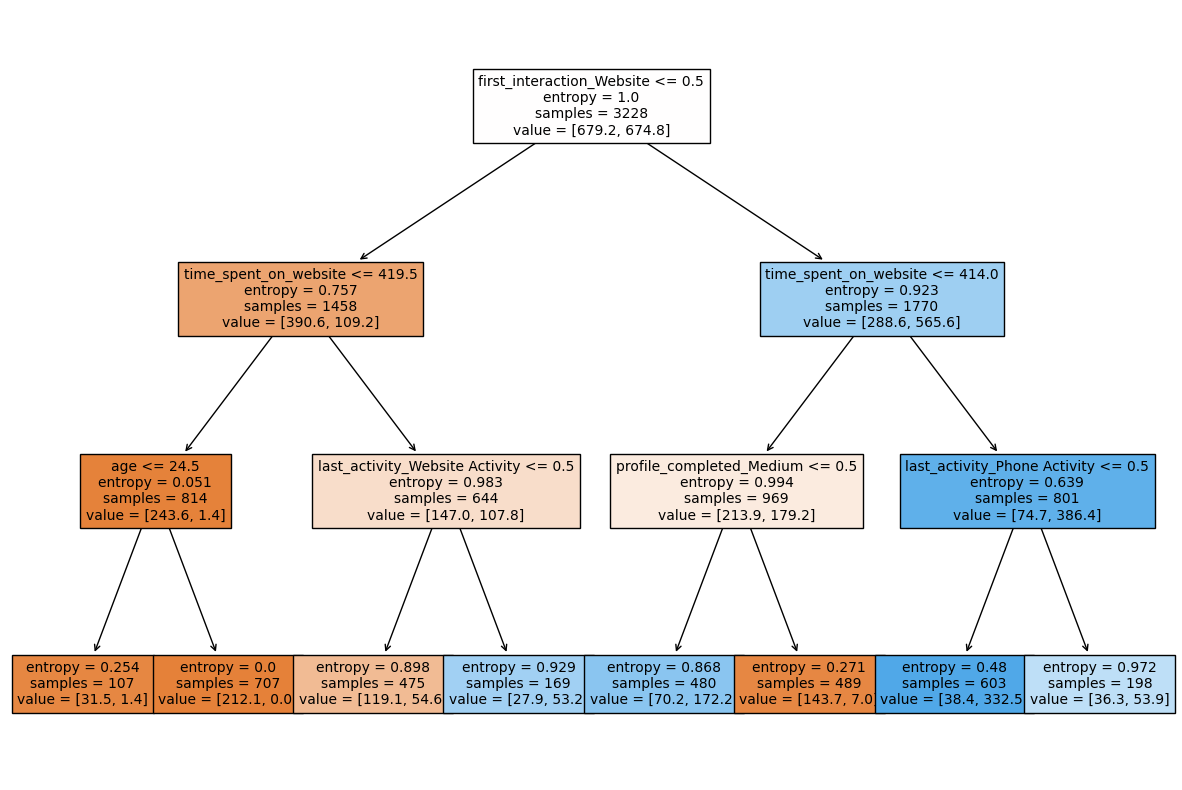

In [121]:
feature_names = list(X_train.columns)
plt.figure(figsize=(15,10))
out = tree.plot_tree(
    dt_estimator,
    max_depth = 4,
    feature_names=feature_names,
    filled=True,
    fontsize=10,
    node_ids=False,
    class_names=None,
)

for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1)
plt.show()

## Building a Random Forest model

In [122]:
# fitting random forest classifier on training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state=1)

rf_estimator.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



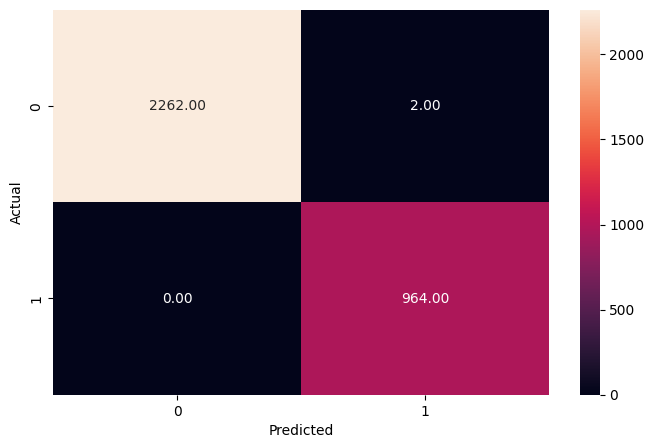

In [123]:
#checking model performance on training data
pred_train_rf = rf_estimator.predict(X_train)
metrics_score(Y_train, pred_train_rf)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       971
           1       0.78      0.71      0.74       413

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



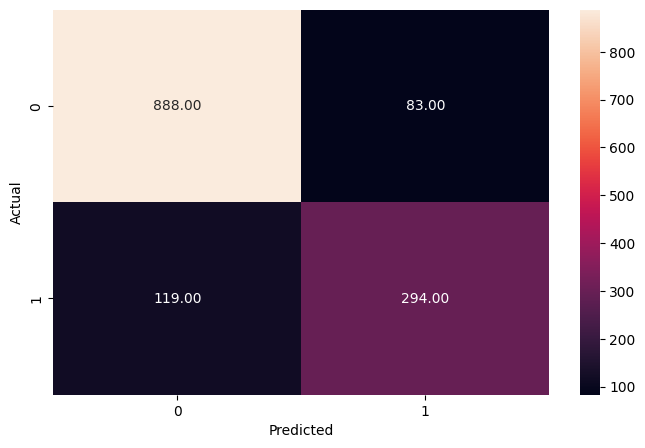

In [124]:
#checking model performance on test data
pred_train_rf = rf_estimator.predict(X_test)
metrics_score(Y_test, pred_train_rf)

Observations:
*  Without any limitations, the model is overfitting. Recall and precision are 1 on the training data, while the test data is much lower.
*  Even with a model that is overfitting, the random forest is still performing better than the initial untuned decision tree, which is to be expected.

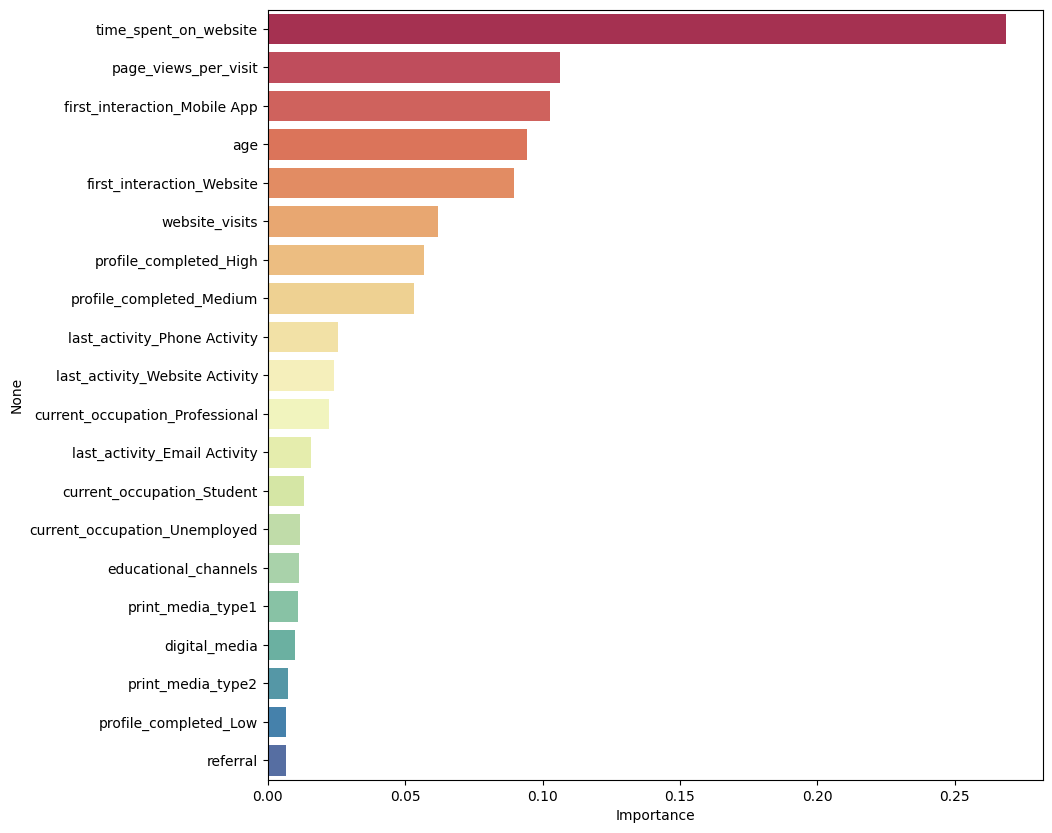

In [125]:
importances = rf_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending=False)
plt.figure(figsize= (10, 10))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index, palette='Spectral');

Observations:

*  The random forest provides similar results in terms of variable importance, ranking Time Spent on Website, Page Views Per Visit and Age being top determining factors.

## Do we need to prune the tree?

Yes, the previous random forest was overfitting, so further model tuning would benefit the performance.

In [126]:
# choose the classifier
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# define a grid of parameters to choose from
params_rf = {
    'n_estimators': [100, 125],
    'max_depth': np.arange(6,12),
    'min_samples_leaf': [20, 25],
    'max_features': [0.8, .9],
    'max_samples': [.9, 1],
    'class_weight': ['balanced', {0: 0.30, 1: 0.70}],
}

# type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, Y_train)

# set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [127]:
# fitting the training data to the model
rf_estimator_tuned.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, max_features=0.8,
                       max_samples=0.9, min_samples_leaf=25, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2264
           1       0.70      0.87      0.78       964

    accuracy                           0.85      3228
   macro avg       0.82      0.86      0.83      3228
weighted avg       0.87      0.85      0.86      3228



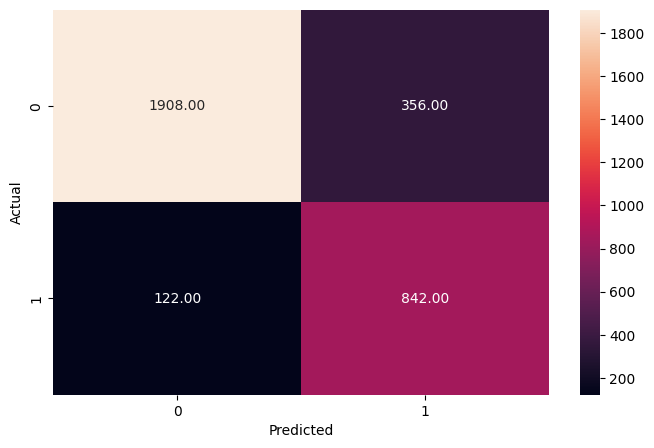

In [128]:
#checking the performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)
metrics_score(Y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       971
           1       0.69      0.84      0.75       413

    accuracy                           0.84      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.84      0.84      1384



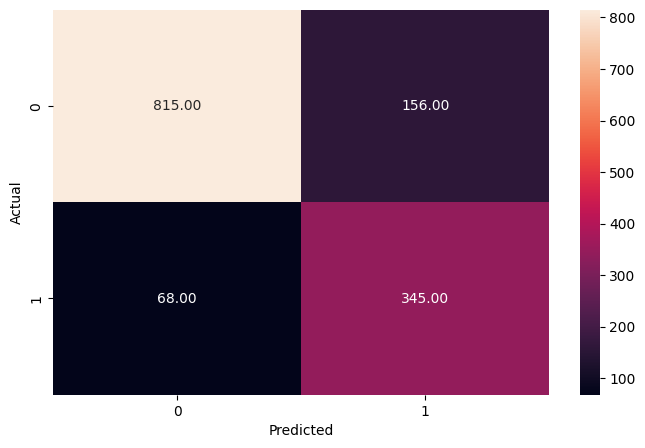

In [129]:
#checking the performance on the training data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)
metrics_score(Y_test, y_pred_test_rf_tuned)

Observations:

*  With further tuning, the model's recall has increased to 84%, up from 71%, which is a much more acceptable model. Interestingly, the recall is still lower than our tuned traditional decision tree.


## Actionable Insights and Recommendations

*  Across multiple analyses, the greatest predicting factor in lead conversion was amount of time spent on the website, as well as web page views. The company therefore may want to continue to and/or expand the attention that is given to the website development, as those who spend more time there are more likely to convert. Conversely, the company may also want to gather further data/metrics on the performance of the mobile app to assess opporrtunities for improvement.
*  Regarding demographic factors, the two most significant factors leading to higher conversion were people who are working professionals and those in the 45+ age range. This demographic group should be specifically targeted with increased attention.
*  Because working prfessionals have such a high conversion rate, the company may want to consider partnerships with selected large coorporations to tap into a market with high conversion rates.
*  Although referrals make up a very small percentage of the number of leads that were brought in, those that did recieve a referral were much more likely to convert than any other advertising media. The company may want to consider an incentives program for referrals, rewarding those customers who make referrals that lead to conversions. This could potentially be a small investment for a large reward.
*  Of all means of interaction, phone calls carried the greatest importance. The company may want to further invest in their phone marketing operations as well as the training of their call center staff.
*  Both model analyses showed that leads which had more complete profiles were more likely to convert. The company could also focus on targeting leads that have invested the time and effort to complete their profiles.
*  Regarding print and digital media advertising, a relatively small percentage of leads have been exposed to either forms of advertising, and when comparing conversions between the exposures of these advertising methods, conversion rates were nearly identical. This suggests that while advertising may be helpful for brand awareness, it is not pivotal in creating conversions.
*  Overall, the profile of a lead that is most likely to convert to a paid customer is someone that is savvy and comfortable navigating websites (and most likely comfortable with an online learning environment), typically is a working professional, around 48 years old and has invested the time to complete their profile on the website.